# **WORKSHOP I**: Dimensionality reduction lab - Machine learning II

By:
- Alvaro Gomez Penuela
- Sebastian Torres Sanchez
- Hector Rendon López

08/sept/2023 - University of Antioquia

In [1]:
# Importing genereal-use libraries for data manipulation
import os

import pandas as pd
import numpy as np

from PIL import Image
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import pairwise_distances

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

import joblib

from flask import Flask, request, jsonify, send_file

In [2]:
# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Combine the path with the desired location
HOME_PATH = os.path.abspath(os.path.join(notebook_dir, "../../"))

print(HOME_PATH)

/Users/usuario/repositorio-personal/especializacion-analitica-machine-learning-2


## **Exercise 1**. Matrices and related concepts

* **Simulate any random rectangular matrix A**

A matrix represent a linear transformations from one vector space to another. The transformation takes input vectors and maps them to output vectors, where this mapping information is contained by the matrix

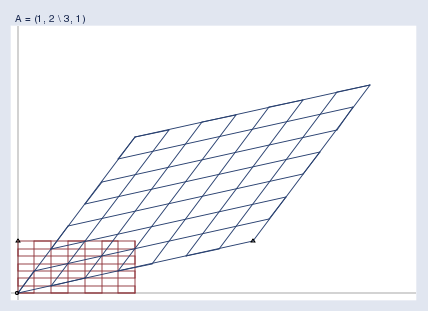

In [3]:
# Generating a random matrix 8 x 5
rows, columns = (8, 5)
matrix_A = np.random.rand(rows, columns)

print(matrix_A)

[[0.01179196 0.12105655 0.99789148 0.57146102 0.08341013]
 [0.39366278 0.9164451  0.78454076 0.90126471 0.88883376]
 [0.2192305  0.70555142 0.89118985 0.05081398 0.30274975]
 [0.38409087 0.0107178  0.60582728 0.84154503 0.69277891]
 [0.5241773  0.04204889 0.82882265 0.16972834 0.75424977]
 [0.46322958 0.17495446 0.13066748 0.36066752 0.3277876 ]
 [0.12506828 0.07114025 0.58919066 0.79257579 0.41266658]
 [0.27107443 0.17459588 0.47231266 0.84619171 0.381482  ]]


- **What is the trace and rank of A?**

The trace of a matrix A, designated by tr(A), is the sum of the elements on the main diagonal: tr(A) = a11, a22, ..., aii (remember that the **every matrix mxn has a main diagonal**, not just the square matrices)

The trace has several important properties such as

* the trace of a linear combination is equal to the linear combination of the traces
* The trace of a sum or product of two matrices is equal to the sum of their traces
* The sum of the eigenvalues of a matrix equals the trace of the matrix if the matrix is diagonal

Geometrically, the trace of a matrix can be interpreted as **a measure of the scaling or stretching factor** along the principal axes of a linear transformation represented by the matrix.  A trace greater than the dimension of the space (e.g., Tr(A) > 2 in 2D) indicates stretching, a trace less than the dimension (e.g., Tr(A) < 2 in 2D) indicates compression, like is shown below



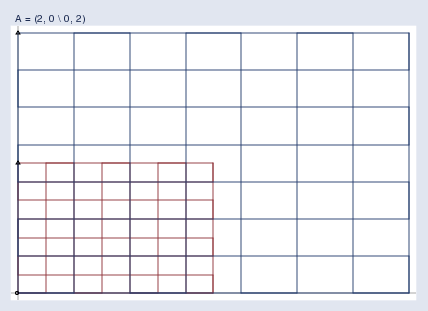

In [4]:
# Calculate the matrix trace
trace_A = np.trace(matrix_A)

print("The matrix trace is:", trace_A)

The matrix trace is: 3.415221730493004


On the other hand, the rank of a matrix is the **number of linearly independent rows or columns** in the matrix. In other words, it is the dimension of the space generated by the rows or columns of the matrix.

For example, if the ran(A) is 3 it means that there are three rows or columns that are linearly independent each other and they form a basis for the column or row space of the matrix.

The rank of a matrix can be calculated using determinants, the Gauss-Jordan method, or the Rouché-Frobenius theorem.

In [5]:
# Calculate the rank
rank_A = np.linalg.matrix_rank(matrix_A)

print("The matrix rank is:", rank_A)

The matrix rank is: 5


- **What is the determinant of A?**

The determinant of a matrix A, det (A) or |A|, is an operation that assigns a scalar to square matrices. Geometrically, the determinant of a matrix represents the signed n-dimensional volume (also called hypervolume) of the parallelepiped formed by the column vectors of the matrix

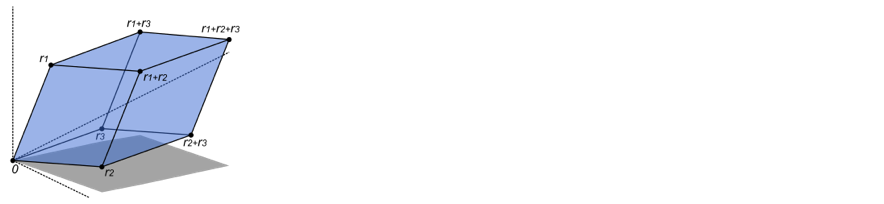

Calculating the determinant of a non-square matrix is not possible because the determinant is only defined for square matrices, as follow

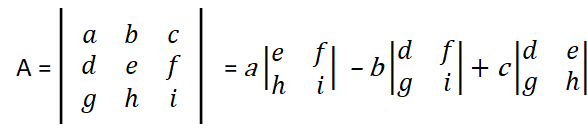

In [6]:
from numpy.linalg import LinAlgError

# Calculate the determinant of the matrix
try:
    determinant = np.linalg.det(matrix_A)
    print("The determinant of the matrix is:", determinant)
except LinAlgError:
    # Handle the exception if the matrix is not square
    print("The matrix is not square, so the determinant cannot be calculated")

The matrix is not square, so the determinant cannot be calculated


- **Can you invert A? How?**

Matrix inversion is defined only for square matrices, let's analyze:
> The invert of matrix A is another matrix B such that A*B = B*A = I, denoted A^(-1), then like identity matrix I is square, A have to be square too

In [7]:
# Calculate the inverse of the matrix
try:
    inverse_matrix = np.linalg.inv(matrix_A)
except:
    print('The matrix is not invertible')
    
'''
Output: "LinAlgError: Last 2 dimensions of the array must be square"
'''

The matrix is not invertible


'\nOutput: "LinAlgError: Last 2 dimensions of the array must be square"\n'

There are others aproaches like the pseudoinverse (Moore-Penrose pseudoinverse), which generalizes matrix inversion to non-square matrices, but they don't behave in the same way as the true inverse

In [8]:
# Calculate the pseudoinverse of the matrix
pseudoinverse_A = np.linalg.pinv(matrix_A)

# Print the pseudoinverse
print("The pseudoinverse of the matrix is:\n", np.round(pseudoinverse_A,2))

The pseudoinverse of the matrix is:
 [[ 0.17 -1.    0.49 -0.27  0.11  2.6  -0.85  0.84]
 [-0.18  0.68  0.55 -0.44 -0.59  0.24 -0.25  0.05]
 [ 0.7  -0.38  0.42 -0.05  0.35 -0.21  0.06 -0.08]
 [ 0.26  0.06 -0.33  0.14 -0.67  0.35  0.27  0.56]
 [-0.99  0.96 -0.57  0.6   0.86 -1.62  0.47 -0.83]]


- **How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?**

**Eigenvectors** represent the directions (axes) along which a linear transformation (a matrix) only stretches or compresses the data without changing the direction, it is essentially  essentially the "unchanged" or "stable" directions of the transformation

In the same way, **eigenvalues** represent the scaling factor by which the eigenvectors are stretched or compressed during the linear transformation

> Note that below Matrix A acts by stretching the vector x, not changing its direction, so x is an eigenvector of A.

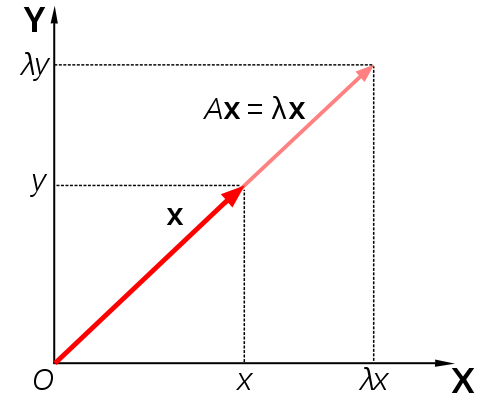

 They both allow to understand what a linear transformation really does without a reference system, so by decomposing a linear transformation (a matrix) into its eigenvectors and eigenvalues, you can gain insights into its behavior. That's **what Singular Value Decomposition** or **Eigenvalue Decomposition** do.

 This decomposition is particularly useful for tasks like dimensionality reduction, where you can focus on the most important eigenvectors (those associated with the largest eigenvalues) to capture the most significant aspects of the transformation or data (the direction and factor of the transformation).

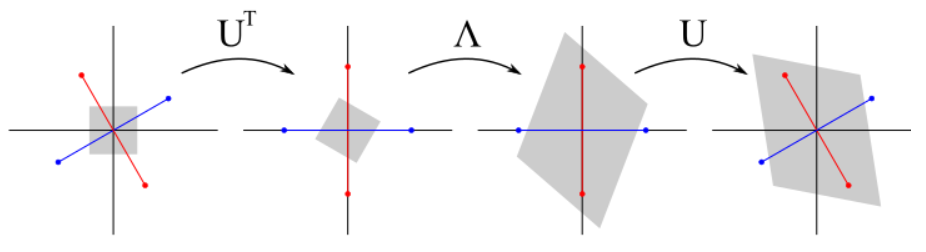

## **Exercise 2**. Facial image processing
Add a steady, well-centered picture of your face to a shared folder alongside your classmates
- Edit your picture to be 256x256 pixels, grayscale (single channel)
- Plot your edited face
- Calculate and plot the average face of the cohort.
- How distant is your face from the average? How would you measure it?

Now let's import and transform the image

In [9]:
from PIL import Image

path_image = os.path.abspath(os.path.join(HOME_PATH, 'workshop-1/data/img/without_process/Alvaro_Gomez.jpg'))

# Open the image file
image = Image.open(path_image)

# Resize the image to 256x256 pixels
image_resized = image.resize((256, 256), Image.LANCZOS)

# Convert the image to grayscale
image_resized_gayscale = image_resized.convert("L")

/var/folders/3y/mth4f5sj3yb99mnhvx2_tp3c0000gp/T/ipykernel_98620/2615303841.py:9: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image_resized = image.resize((256, 256), Image.LANCZOS)


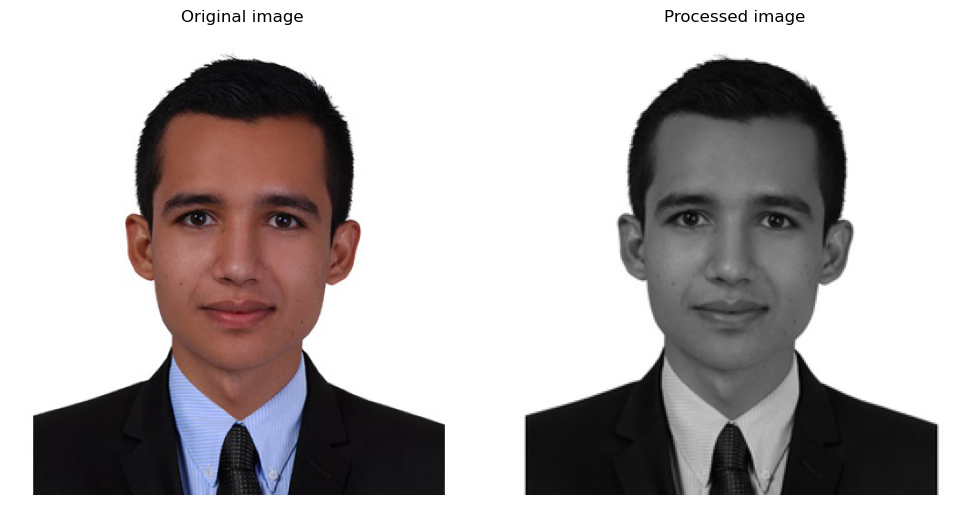

In [10]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns for two images

# Display the images
axes[0].imshow(image)
axes[0].set_title("Original image")

axes[1].imshow(image_resized_gayscale, cmap='gray')
axes[1].set_title("Processed image")

# Turn off the axis
for ax in axes:
  ax.axis('off')

# Adjust spacing between and showing
plt.tight_layout()
plt.show()

In [11]:
# Save the image
path_image = os.path.abspath(os.path.join(HOME_PATH, 'workshop-1/data/img/process/Alvaro_Gomez_processed.jpg'))

image_resized_gayscale.save(path_image)

Now, let's import the face images from all participants in the cohort, calculating the average of these images pixel by pixel, and then plotting the resulting "average face." The average face should represents the typical features of the group

In [12]:
# Get the images path
import os

folder_path = os.path.abspath(os.path.join(HOME_PATH, 'workshop-1/data/img/process'))
images_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')]

In [13]:
# Sample
images_paths[:3]

['/Users/usuario/repositorio-personal/especializacion-analitica-machine-learning-2/workshop-1/data/img/process/DanielAcosta.jpg',
 '/Users/usuario/repositorio-personal/especializacion-analitica-machine-learning-2/workshop-1/data/img/process/AndresFelipeOrrego.jpg',
 '/Users/usuario/repositorio-personal/especializacion-analitica-machine-learning-2/workshop-1/data/img/process/maria_ipia.jpg']

In [14]:
# Numbers of images
print(f'There are {len(images_paths)} images uploaded')

There are 28 images uploaded


In [15]:
# Create a dictionary to store the uploaded images
loaded_images = {}

# Load and store each image
for image_path in images_paths:
    # Extract the file name without the extension to use as the dictionary key
    file_name = os.path.splitext(os.path.basename(image_path))[0]

    # Open the image
    image = Image.open(image_path)

    # Store the image in the dictionary with the file name as the key
    loaded_images[file_name] = image

In [16]:
# List of images uploaded
images_list = list(loaded_images.keys())
images_list

['DanielAcosta',
 'AndresFelipeOrrego',
 'maria_ipia',
 'edward_giraldo_gray',
 'SGZ_gray',
 'shir',
 'OsvalAgudelo256256',
 'JenniferD',
 'DanielRestrepo',
 'lina_montoya',
 'Lina_Beltran',
 'Laura_Torres_prep',
 'johan_vargas',
 'AnaEstefaniaHenaogrises',
 'sebastian_torres',
 'Fernando_Franco_grayscale',
 'JuanJoseGilHoyos_grayscale',
 'Alvaro_Gomez_processed',
 'jessica_torres_f',
 'Diego',
 'Foto_procesada',
 'edwar_ramirez_gs',
 'Viviana_256x256_grises',
 'AE256',
 'esteban_jm',
 'Vanessa_256x256_grises',
 'SEBASTIANHOLGUINOSORIO',
 'FedericoOcampo']

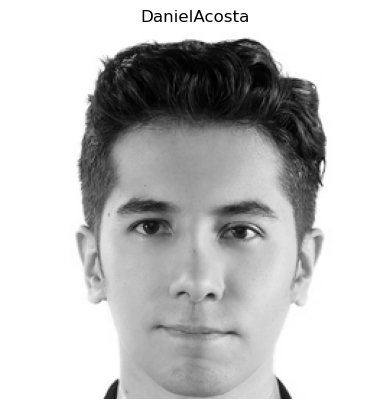

In [17]:
# Image example
image_example = loaded_images['DanielAcosta']

plt.imshow(image_example)
plt.title('DanielAcosta')
plt.axis('off')
plt.show()

In [18]:
# Convert the images to NumPy arrays and ensure they have the same shape (256x256), all stored in a list

loaded_images_array = [
    np.array(image.convert('L').resize((256, 256)))  # Convert to grayscale and resize
    for image in loaded_images.values()
]

In [19]:
# Calculate the average pixel-wise

average_images_array = np.mean(loaded_images_array, axis=0).astype(np.uint8) # np.uint8 ensures the correct data type for image representation

# Create a new image from the average pixel values
average_image = Image.fromarray(average_images_array)

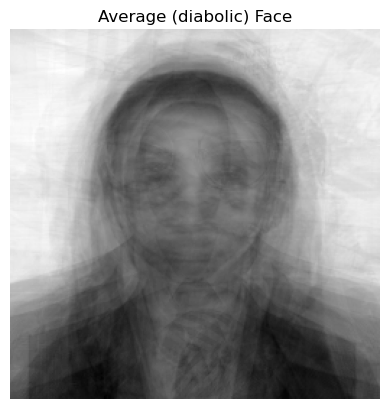

In [20]:
# Display the avg image

plt.imshow(average_image, cmap='gray')
plt.title('Average (diabolic) Face')
plt.axis('off')
plt.show()

It's done! We already have the average face features image

* Now, let's answer how distant is my face from the average and how I would measure it: First, I'm gonna try with a simple subtraction

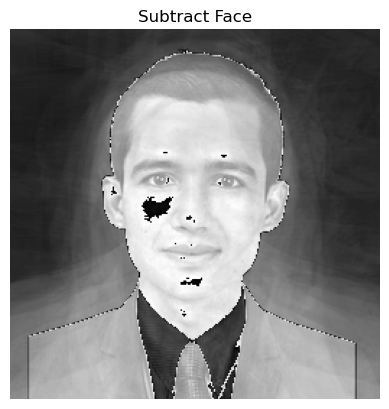

In [21]:
# Subtract the two images arrays
subtracted_face_array = np.array(image_resized_gayscale) - average_images_array

# Convert the resultant NumPy array back to an image
subtracted_face = Image.fromarray(subtracted_face_array)

# Display the resultant image
plt.imshow(subtracted_face, cmap='gray')
plt.title('Subtract Face')
plt.axis('off')
plt.show()

The resulting average image shows the differences between mi face and the average face. These differences can include variations in facial features, lighting conditions, and expressions. I don't know well why my face is still recognizable

Doing some research I found that there are various image similarity metrics. One common metric is the **Structural Similarity Index (SSIM)**, which measures the structural similarity between two images. Another metric is the known **Mean Squared Error (MSE)**, which measures the average squared difference between pixel values

In [22]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Calculate SSIM
ssim_score = ssim(np.array(image_resized_gayscale), average_images_array, channel_axis=0)

# Calculate MSE
mse_score = mean_squared_error(np.array(image_resized_gayscale).flatten(), average_images_array.flatten())

# Print the similarity scores
print(f"SSIM Score: {ssim_score:.2f}")
print(f"MSE Score: {mse_score:.2f}")

SSIM Score: 0.62
MSE Score: 112.96


SSIM produces a score between -1 and 1, with higher values indicating greater similarity or image quality. **Moderate Similarity** corresponds to 0.5 < SSIM < 0

## **Exercise 3**.  Unsupervised Python package
- Same API as scikit-learn: fit(), fit_transform(), transform(), hyperparams at init
- Manage dependencies with Pipenv or Poetry

I know, I know, Colab and his notebooks are not the best choice for writing code but... It's easy to use, fast and helps me create prototypes. That's why I'm going to make the modules here to export later

### **Implement SVD from scratch using Python and NumPy**

Singular Value Decomposition, SVD, is a factorization method used in linear algebra to **break down a matrix into simpler, more interpretable components**. SVD decomposes a matrix A into three other matrices: A = USV^T

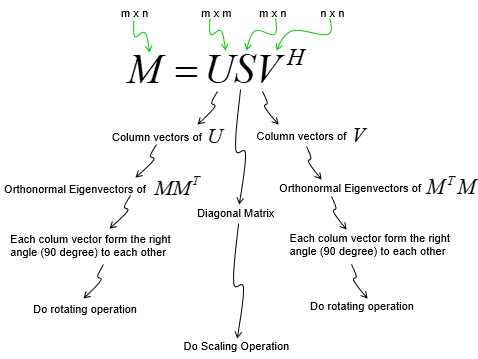

As we already know, a matrix that can be seen as a linear transformation so the transformation associated with a matrix can be decomposed with the help of the SVD into **three simpler and isolate transformation: rotations and re-scaling**.


1. U (left singular vectors) is an m x m orthogonal matrix and represents rotation.
2. S (singular values) is an m x n diagonal matrix containing the singular values of A and represents re-scaling
3. V^T (right singular vectors) is the transpose of an n x n orthogonal matrix V and represents rotation

The new three matrices can be seen as sub-transformations of the space, it is, instead of doing the transformation in one movement, we decompose it in three movements.

SVD is applicable to both real and complex and allows you to decompose a **rectangular matrix** (that's why it is the alternative to eigendecomposition). Any matrix has a singular value decomposition


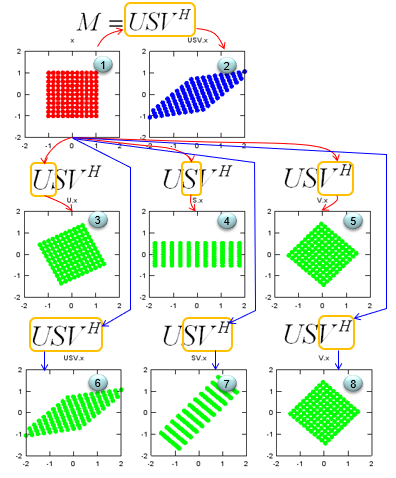

Let's assume we have an m x n matrix A that we want to decompose into U, D, and V^T (the transpose of V)

In [23]:
# svd.py

class CustomSVD:
    def __init__(self, n_components=2):
        """
        Initialize the SVD object.

        Parameters:
        - n_components (int): The number of components to retain.
        """
        self.n_components = n_components
        self.U = None
        self.S = None
        self.Vt = None

    def fit(self, matrix):
        """
        Compute matrix standardization, it is, take a matrix and change it so that its mean is equal to 0
        and variance is 1 and Fit the SVD model to the input data.

        Parameters:
        - Matriz (numpy.ndarray): The input data matrix.
        """
        self.mean = np.mean(matrix, axis=0)
        self.std = np.std(matrix, axis=0)
        self.matrix_standardized = (matrix - self.mean) / self.std

        self.U, self.S, self.Vt = np.linalg.svd(matrix)

    def transform(self, matrix):
        """
        Transform the input data using the SVD components.

        Parameters:
        - matrix (numpy.ndarray): The input data matrix to transform.

        Returns:
        - matrix_reduced (numpy.ndarray): The transformed data with reduced dimensions.
        """
        matrix_reduced = np.dot(matrix, self.Vt.T[:, :self.n_components])
        return matrix_reduced

    def predict(self, matrix):
        """
        Reconstruct the input data using the SVD components.

        Parameters:
        - matrix (numpy.ndarray): The input data matrix to reconstruct.

        Returns:
        - matrix_reconstructed (numpy.ndarray): The reconstructed data matrix.
        """
        matrix_reconstructed = np.dot(self.transform(matrix), self.Vt[:self.n_components, :])
        return matrix_reconstructed

Understanding above class logic:

1. The init method initializes the SVD object with a default value for n_components, which you can adjust during object creation.
2. The fit method performs standardization and SVD on the input data matrix A and stores the resulting matrices U, S, and Vt as class attributes.
3. The transform method takes an input data matrix A and returns a transformed matrix with reduced dimensions based on the specified number of components.
4. The predict method reconstructs the input data matrix A using the SVD components.

Reducing the number of components by limiting the columns of the Vt (transpose of right singular vectors) matrix is a common technique for dimensionality reduction.

The multiplication to perform **dimensionality reduction or reconstruction is typically done with Vt**, Vt, encode the relationship between the original features (columns of the data matrix) and the principal components. These vectors determine how each feature contributes to each principal component, then to perform dimensionality reduction using SVD, you can choose to retain only a subset of the principal components.

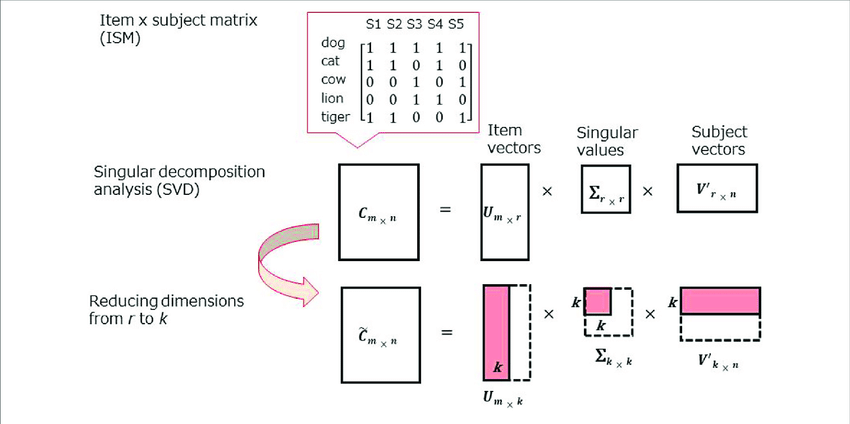

Testing the class:

In [24]:
# Create an SVD object with a specified number of components
svd = CustomSVD(n_components=2)

# Fit the SVD model to the data
data_matrix = np.array([[2, -3, 4],[-9, 6, 2],[5, 1.4, 8.7],[-0.1, -3, -2]])
svd.fit(data_matrix)

# Transform and predict using the SVD model
transformed_data = svd.transform(data_matrix)
reconstructed_data = svd.predict(data_matrix)

print("Original Matrix:")
print(data_matrix)
print("\nStandardized Matrix:")
print(svd.matrix_standardized)
print("\nReduced Matrix:")
print(transformed_data)
print("\nReconstructed Matrix:")
print(reconstructed_data)

Original Matrix:
[[ 2.  -3.   4. ]
 [-9.   6.   2. ]
 [ 5.   1.4  8.7]
 [-0.1 -3.  -2. ]]

Standardized Matrix:
[[ 0.48390765 -0.89959228  0.2141458 ]
 [-1.62420487  1.5172228  -0.30499554]
 [ 1.05884742  0.28196176  1.43412794]
 [ 0.0814498  -0.89959228 -1.34327821]]

Reduced Matrix:
[[-4.44032394 -1.45406514]
 [ 8.92704472 -6.36516934]
 [-7.17362197 -7.12905277]
 [-0.2419978   3.20456835]]

Reconstructed Matrix:
[[ 3.42139329 -0.94467435  3.03849311]
 [-8.52741952  6.68334836  1.68032114]
 [ 4.67894966  0.93576325  8.91717572]
 [ 0.76940519 -1.74284563 -2.58811244]]


In [25]:
# Let’s check the shapes of our matrices

print(f'U shape: {svd.U.shape}, S shape: {svd.S.shape} and Vt shape: {svd.Vt.shape} in A = U S Vt')

U shape: (4, 4), S shape: (3,) and Vt shape: (3, 3) in A = U S Vt


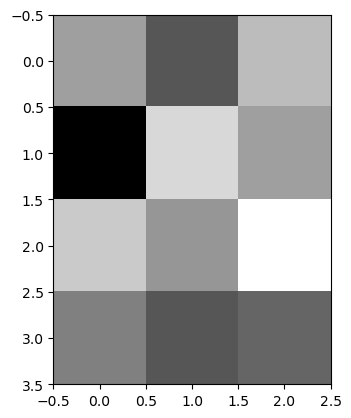

In [26]:
# Rebilding the face picture manually with just 3 components
reconstimg = np.matrix(svd.U[:, :3]) * np.diag(svd.S[:3]) * np.matrix(svd.Vt[:3, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

### **Implement PCA from scratch using Python and NumPy**

Principal Component Analysis (PCA) is a dimensionality reduction technique that is often performed using matrix decomposition methods, specifically SVD or the **Eigendecomposition of the covariance matrix** (like in this case). Both of these matrix decomposition techniques are used to extract the principal components, which represent the directions of maximum variance in the data.

At the core of Eigendecomposition are two concepts: **eigenvectors** that are the axis of rotation during a linear tranformation and  **eigenvalues** that tell us how the matrix stretches or compresses. Each eigenvalue is associated with a specific eigenvector.

The eigendecomposition equation is:

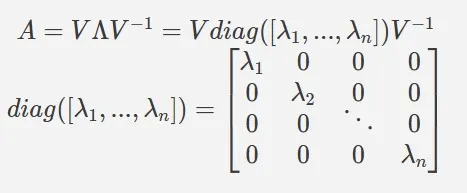

What this equation tells us is that any square matrix **A**(n x n) can be broken down into these constituent parts: the matrix of eigenvectors **V**(n x n), the diagonal matrix of eigenvalues **Λ**(n x n), and the inverse of the matrix of eigenvectors **V⁻¹**. This decomposition provides valuable insights into the behavior of the matrix, particularly how it transforms vectors and its inherent structural properties.

In [27]:
class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the CustomPCA object with the number of components to return.

        Parameters:
        n_components (int or None): Number of principal components to return. If None, all components will be return.
        """
        self.n_components = n_components
        self.mean = None
        self.std_dev = None
        self.components = None

    def fit(self, A):
        """
        Fit the PCA model to the input data A.

        Parameters:
        A (numpy.ndarray): Input data matrix of shape (m, n) where m is the number of rows and n is the number of columns.

        Returns:
        self
        """

        # Standardize the data
        self.mean = np.mean(A, axis=0)
        self.std_dev = np.std(A, axis=0)

        A_std = (A - self.mean) # / self.std_dev

        # Calculate the covariance matrix
        cov_matrix = np.cov(A_std, rowvar=False)

        # Calculate eigenvalue-eigenvector of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the desired number of components
        if self.n_components is not None:
            self.components = eigenvectors[:, :self.n_components]
        else:
            self.components = eigenvectors

        return self

    def fit_transform(self, A):
        """
        Fit the PCA model to the input data A and transform it.

        Parameters:
        A (numpy.ndarray): Input data matrix of shape (m, n) where m is the number of rows and n is the number of columns.

        Returns:
        transformed_data (numpy.ndarray): Transformed data matrix of shape (m, k) where k is the number of return components.
        """
        self.fit(A)
        return self.transform(A)

    def transform(self, A):
        """
        Transform the input data A using the fitted PCA model.

        Parameters:
        A (numpy.ndarray): Input data matrix of shape (m, n) where m is the number of rows and n is the number of columns.

        Returns:
        transformed_data (numpy.ndarray): Transformed data matrix of shape (m, k) where k is the number of return components.
        """
        A_std = (A - self.mean)
        transformed_data = A_std @ self.components
        return transformed_data

Each eigenvector-eigenvalue pair represents a principal component of the data, and including more components means retaining more information from the original data.

In [28]:
# Create a PCA object with a specified number of components
pca = CustomPCA(n_components=2)

# Fit the PCA model to the data
data_matrix = np.array([[2, -3, 4],[-9, 6, 2],[5, 1.4, 8.7]])
pca.fit(data_matrix)

# Transform and predict using the PCA model
reconstructed_data = pca.fit_transform(data_matrix)

print("Original Matrix:")
print(data_matrix)
print("\nReduced Matrix:")
print(reconstructed_data)

Original Matrix:
[[ 2.  -3.   4. ]
 [-9.   6.   2. ]
 [ 5.   1.4  8.7]]

Reduced Matrix:
[[-3.8383592  -3.62480632]
 [ 9.90704147  0.50604838]
 [-6.06868227  3.11875794]]


### **Implement t-SNE from scratch using Python and NumPy**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique that is widely used for visualizing high-dimensional data in lower-dimensional spaces, beacuse it keeps the distances between the points of data.

SNE works by converting the euclidean distance between data points to conditional probabilities that represent similarities in distances. Essentially, the probability of point xj being a neighbour of point xi is proportional to the distance between these two points, where closer distances have much more weigh (probability).

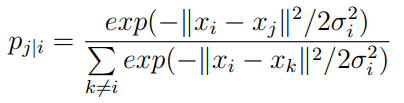

Now, Y is an Nx2 matrix that is our 2D representation of X. Based on Y we can construct distribution q as per our construction of p (but without the σ ’s):

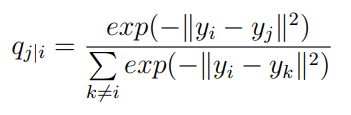

Our overall goal is to pick the points in Y such that this resulting conditional probability distribution q is similar to p . This is achieved by minimising a cost: the KL-divergence between these two distributions. This is defined as follows

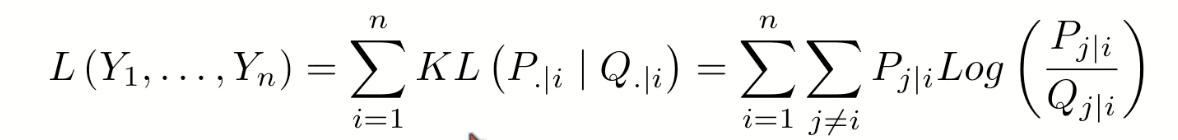

This function tells the discrepancy that exists between P and Q; if they are equal, the logarithm would be zero and the cost function would be zero too (that's the reason why use the logarithm since it strongly penalizes the larger differences between P and Q (log < 0) and  minimizes the importance of small distances, and tha's why tsne maintains the notion of local distance (it is, preserves clusters), but produces a distortion of large distances).



To get σ's, we use perplexity. The perplexity of any of the rows of the conditional probabilities matrix P is defined as (where H(Pi) is the Shannon entropy of Pi in bits)

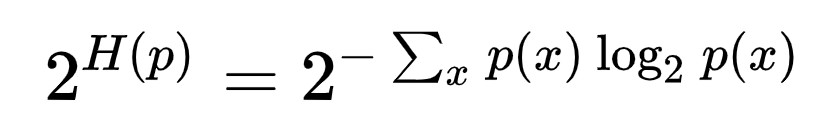

Let’s intuit about this: if a probability distribution has high entropy, it means that it is relatively flat that is, the probabilities of most of the elements in the distribution are around the same.

Perplexity increases with entropy. Thus, if we desire higher perplexity, we want all of the pji to be more similar to each other (perplexity, and then σ, acts just like the temperature parameter in the softmax function).

Higher **perplexity** increase the number of neighbours each point has (it's like a **parameter of distance tolerance**: the lower it is, the smaller distances will be separated strongly, recomended between 30 and 50).

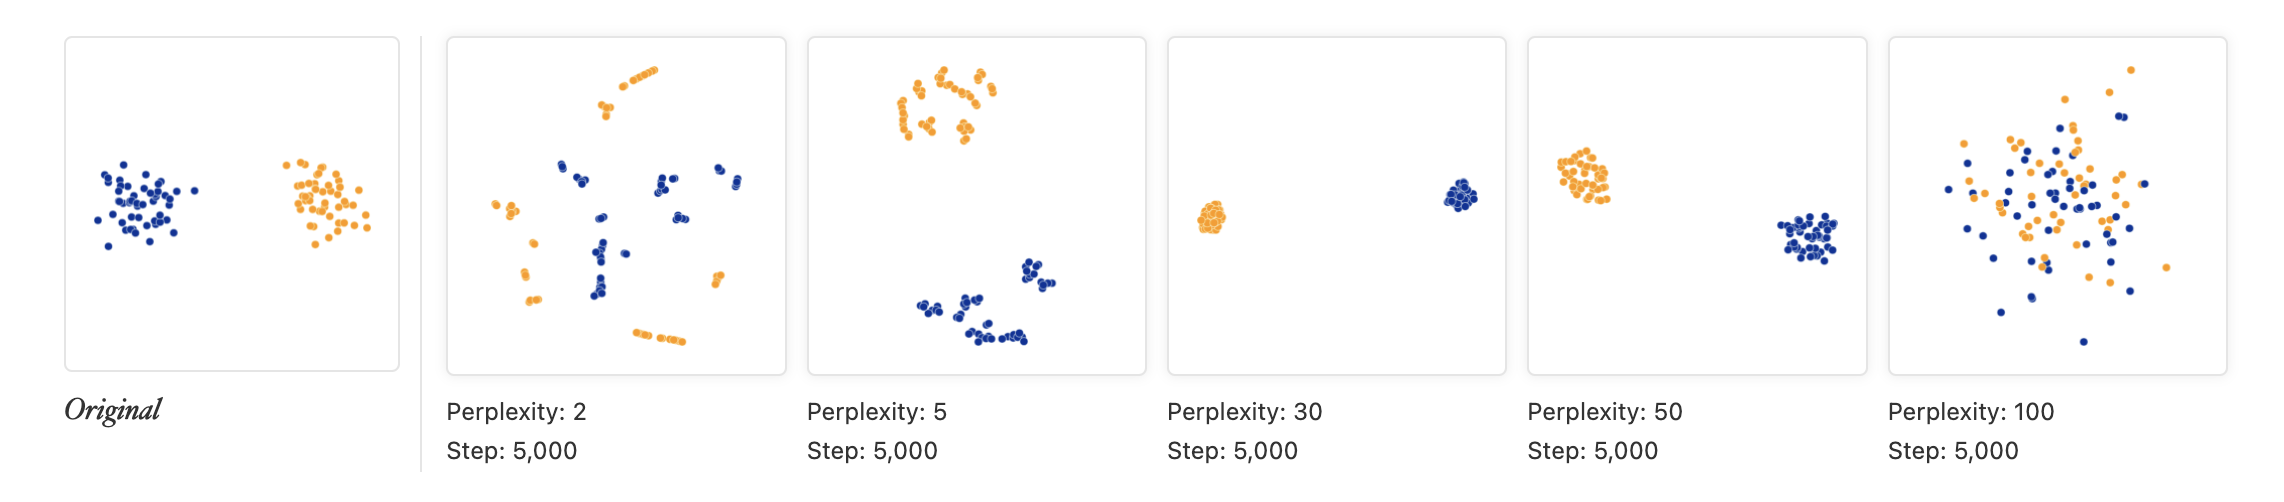

The cost function (Kullback-Leibler divergence) is minimizes using gradient descent. The diferential equiation and its solution is shown below

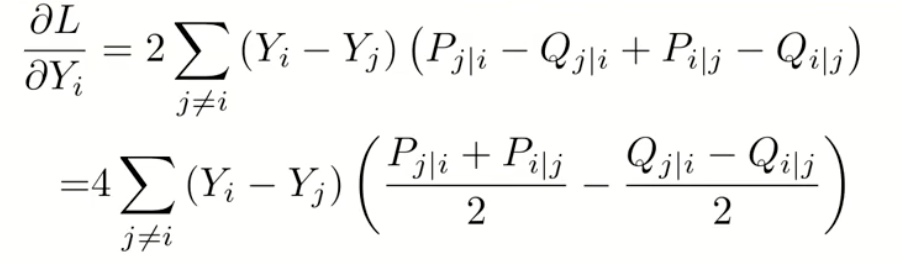

This equation causes the points in the projected space Y (eg 2D) to move in the most convenient direction to minimize the loss. Each solution of this function corresponds to one **iteration**. At the beginning of the iteration, the movements will be very abrupt but in the right direction, then they will stabilize until they form relatively stable clusters (between 200 and 500 iterations).

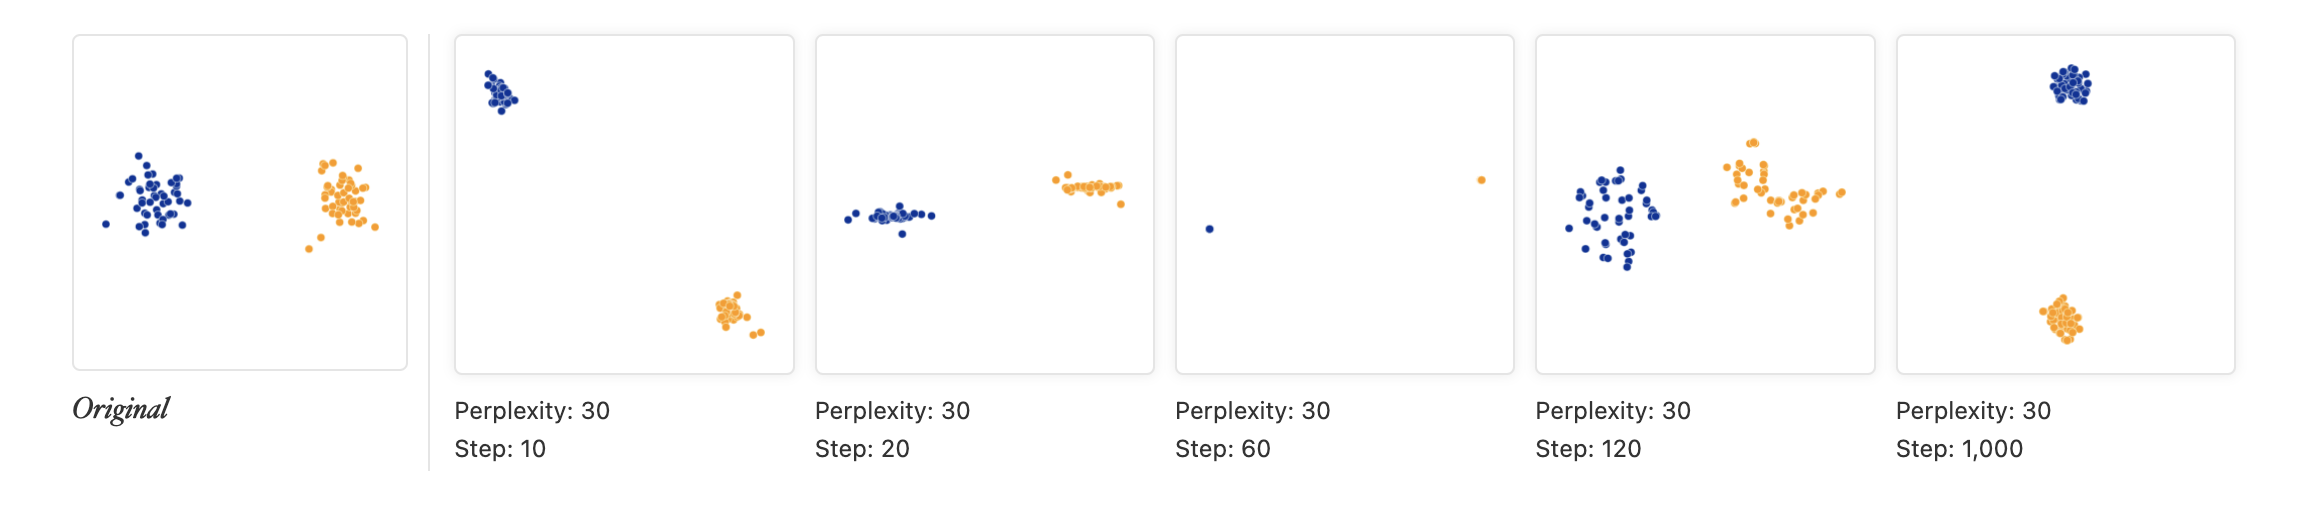

Until now, we have strictly spoken of the stochastic neighbor embedding (SNE) method. A substantial improvement to this technique consists in replacing the Gaussian metric used in the low-dimensional representation Q by a metric with longer tails that corresponds to the t-student distribution with degree of freedom 1. This allows increasing the separation in space of the observations further away each other in low-dimensional space, which spreads out the clusters in the projection space. The new Q is:

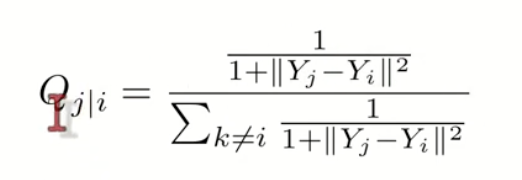

Hence the name t-SNE is derived. Good tips about how to right use it in here https://distill.pub/2016/misread-tsne/

Now let's go coding

In [29]:
# Implement t-SNE

class CustomTSNE:
  def __init__(self, n_components=2, perplexity=30, learning_rate=0.1, n_iter=200):
      """
      Initialize the t-SNE object.

      Parameters:
      - n_components (int): The number of dimensions in the embedded space.
      - perplexity (float): The perplexity parameter (trade-off between preserving global and local structure).
      - learning_rate (float): The learning rate for gradient descent optimization.
      - n_iter (int): The number of iterations for optimization.
      """
      self.n_components = n_components
      self.perplexity = perplexity
      self.learning_rate = learning_rate
      self.n_iter = n_iter
      self.embedding = None

  def fit_transform(self, X):
      """
      Fit the t-SNE model to the input data and return the embedded data.

      Parameters:
      - X (numpy.ndarray): The input data matrix to perform t-SNE on.

      Returns:
      - X_embedded (numpy.ndarray): The embedded data in the low-dimensional space.
      """
      n_samples, n_features = X.shape
      pairwise_distances = np.linalg.norm(X[:, np.newaxis, :] - X[np.newaxis, :, :], axis=2)
      P = self._compute_pairwise_probabilities(pairwise_distances)
      Y = np.random.randn(n_samples, self.n_components)
      Y = self._gradient_descent(Y, P)
      self.embedding = Y
      return Y

  def _compute_pairwise_probabilities(self, pairwise_distances):
      P = np.zeros((pairwise_distances.shape[0], pairwise_distances.shape[0]))
      perplexity_values = [self.perplexity]
      for i in range(pairwise_distances.shape[0]):
          P[i, :] = self._binary_search_perplexity(pairwise_distances[i, :], perplexity_values)
      P = (P + P.T) / (2 * pairwise_distances.shape[0])
      P = np.maximum(P, 1e-12)
      return P

  def _binary_search_perplexity(self, distances_row, perplexity_values, tol=1e-5):
      beta = np.ones(distances_row.shape[0])
      target_entropy = np.log(self.perplexity)
      for _ in range(50):
          current_perplexity = np.sum(np.exp(-distances_row * beta))
          current_entropy = np.log(current_perplexity)
          entropy_diff = current_entropy - target_entropy
          if np.abs(entropy_diff) < tol:
              return beta
          gradient = -distances_row * np.exp(-distances_row * beta)
          gradient_sum = np.sum(gradient)
          beta += (entropy_diff / gradient_sum) * gradient
          beta = np.maximum(beta, 1e-12)
      return beta

  def _gradient_descent(self, Y, P):
      for _ in range(self.n_iter):
          Q = self._compute_low_dimensional_probabilities(Y)
          grad = self._compute_gradient(P, Q, Y)
          Y -= self.learning_rate * grad
      return Y

  def _compute_low_dimensional_probabilities(self, Y):
      pairwise_distances = np.linalg.norm(Y[:, np.newaxis, :] - Y[np.newaxis, :, :], axis=2)
      Q = 1 / (1 + pairwise_distances ** 2)
      Q /= np.sum(Q)
      return np.maximum(Q, 1e-12)

  def _compute_gradient(self, P, Q, Y):
      gradient = np.zeros(Y.shape)
      for i in range(Y.shape[0]):
          diff = (P[i, :] - Q[i, :])[:, np.newaxis]
          gradient[i, :] = np.sum(diff * (Y[i, :] - Y), axis=0)
      return gradient


To test the TSNE class, let's use the Iris dataset, which is a commonly used dataset for testing dimensionality reduction techniques:
* This data sets consists of 3 different types of irises petal and sepal length, stored in a 150x4 numpy.ndarray. One class is linearly separable from the other 2; the latter are not linearly separable from each other.

In [30]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

Let's visualize three of the four dimensions of iris (Sepal Length, Sepal Width, Petal Length, Petal Width) usig a 3D plot and a 2D plot with the color scale as another dimesion

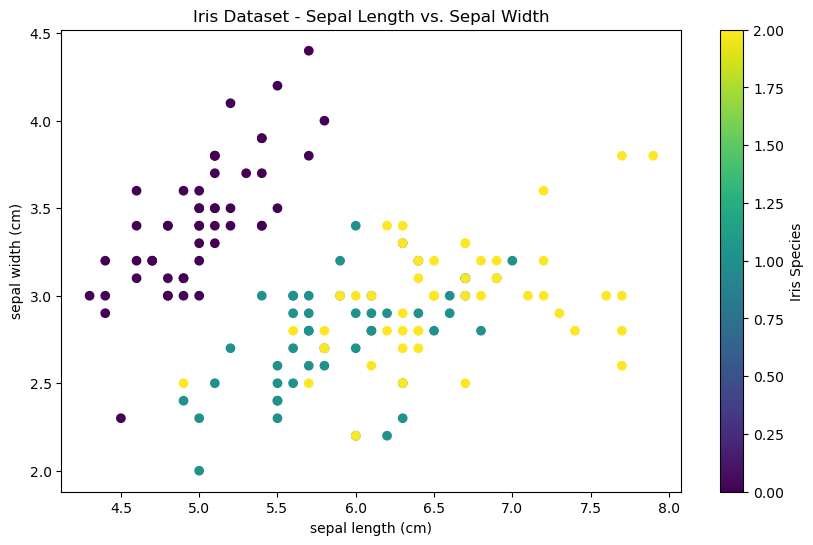

In [31]:
# Load the Iris dataset
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=iris_target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset - Sepal Length vs. Sepal Width")
plt.colorbar(label="Iris Species")
plt.show()


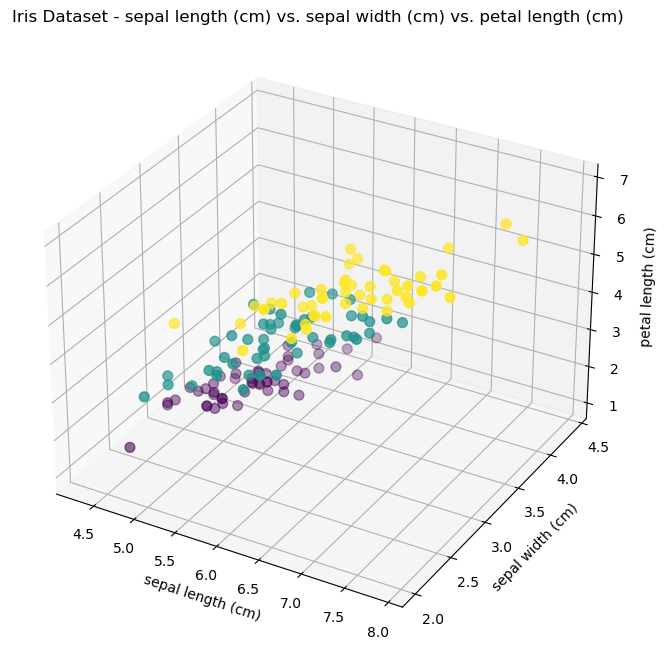

In [32]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Choose three features (dimensions) for the 3D scatter plot
feature1 = 0  # Sepal length
feature2 = 1  # Sepal width
feature3 = 2  # Petal length

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_data[:, feature1], iris_data[:, feature2], iris_data[:, feature3], c=iris_target, cmap='viridis', s=50)

# Label the axes
ax.set_xlabel(iris.feature_names[feature1])
ax.set_ylabel(iris.feature_names[feature2])
ax.set_zlabel(iris.feature_names[feature3])
ax.set_title(f"Iris Dataset - {iris.feature_names[feature1]} vs. {iris.feature_names[feature2]} vs. {iris.feature_names[feature3]}")

# Show the plot
plt.show()

Now, let's apply our t-SNE class to reduce dimentions up to 2D and then plot (the quality of the cluster will be strongly incluenced by the hyperparameters optimization)

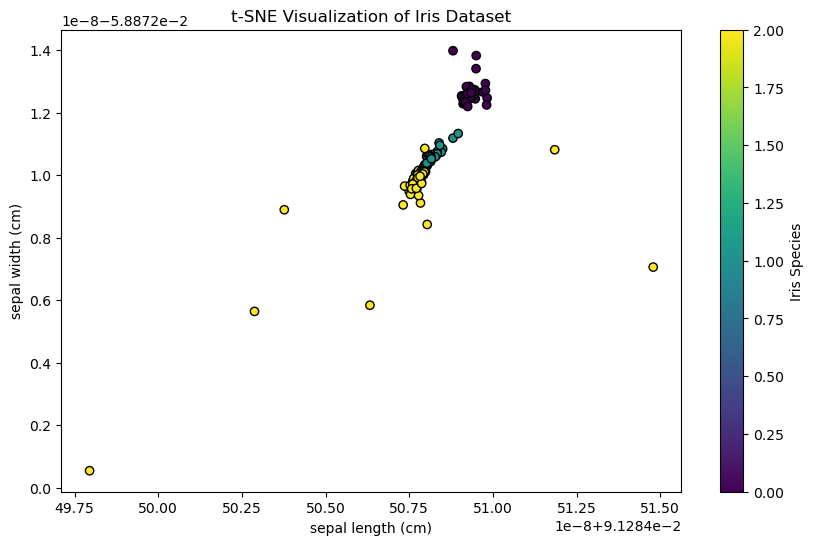

In [33]:
# Create an instance of the TSNE class
tsne = CustomTSNE(n_components=2, perplexity=6.8, learning_rate=0.09, n_iter=170)

# Fit the TSNE model to the data and obtain the embedded representation
X_embedded = tsne.fit_transform(iris_data)

# Plot the embedded data
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=iris_target, cmap='viridis', edgecolor='k')
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label="Iris Species")
plt.show()

A standard output image of the low-dimensional representation, taken from https://levelup.gitconnected.com/visualizing-higher-dimensional-data-into-human-interpretable-plots-3f5e7968d267

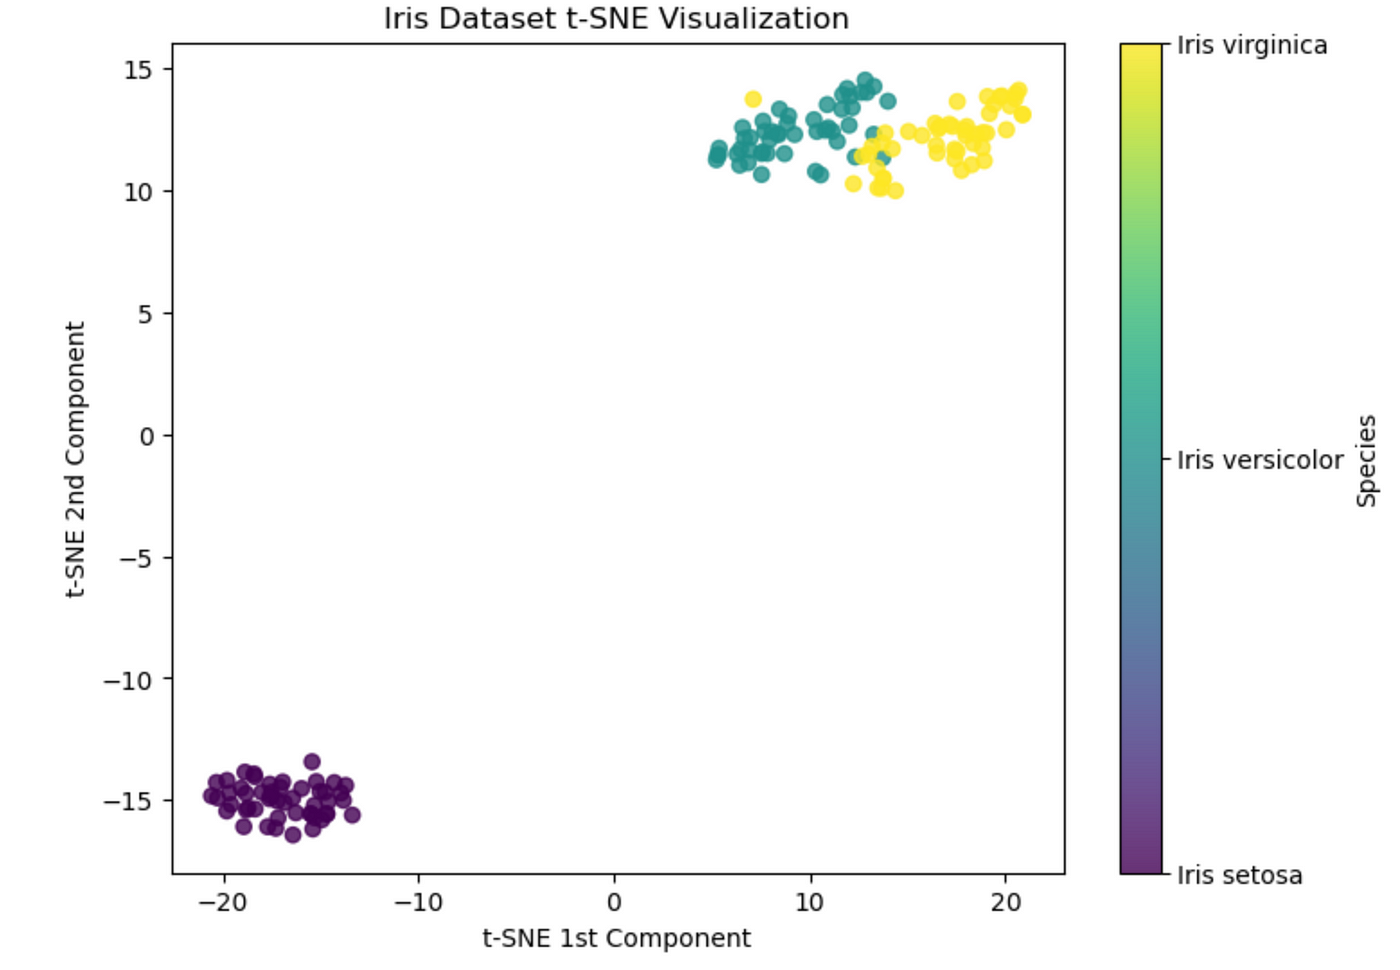

## **Exercise 4**.  SVD to images compresion
Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?

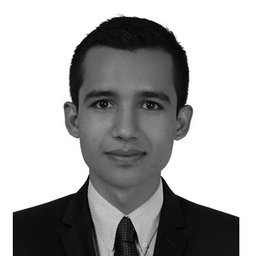

In [34]:
# Picure
image_resized_gayscale

In [35]:
# Size of the array
image_resized_gayscale_array = np.array(image_resized_gayscale)
image_resized_gayscale_array.shape

(256, 256)

In [36]:
# Create a SVD object with a specified number of components
n_components= 35
svd = CustomSVD(n_components= n_components)

# Fit the SVD model to the picture array
svd.fit(image_resized_gayscale_array)

# Transform and predict using the SVD model
transformed_matrix = svd.transform(image_resized_gayscale_array)
reconstructed_matrix = svd.predict(image_resized_gayscale_array)

/var/folders/3y/mth4f5sj3yb99mnhvx2_tp3c0000gp/T/ipykernel_98620/2531404378.py:26: RuntimeWarning: invalid value encountered in divide
  self.matrix_standardized = (matrix - self.mean) / self.std


In [37]:
# Convert the resultant reconstruction array back to an image
subtracted_face = Image.fromarray(reconstructed_matrix)

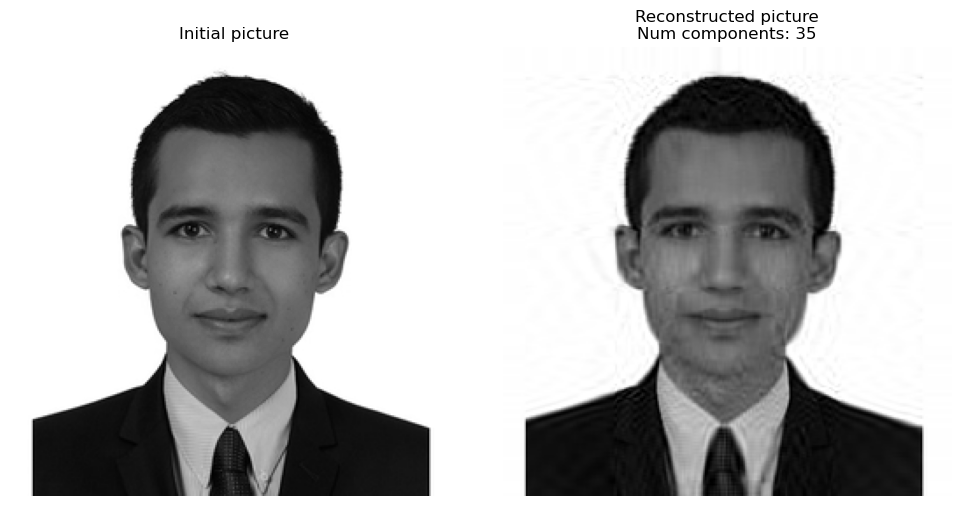

In [38]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images
axes[0].imshow(image_resized_gayscale, cmap='gray')
axes[0].set_title("Initial picture")

axes[1].imshow(subtracted_face, cmap='gray')
axes[1].set_title(f"Reconstructed picture\nNum components: {n_components}")

# Turn off the axis
for ax in axes:
  ax.axis('off')

# Adjust spacing between and showing
plt.tight_layout()
plt.show()

Calculate SSIM image similarity metric:

In [39]:
# Calculate SSIM
ssim_score = ssim(reconstructed_matrix, image_resized_gayscale_array, channel_axis=0)

/Users/usuario/opt/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [40]:
print(f"SSIM Score: {ssim_score:.2f}")

SSIM Score: 0.34


With only 35 of the initial 256 components is possible to visually reconstruct the initial picture, although the SSIM metric indicates that they do not have high similitude. It is also possible to calculate a Pareto plot of the cumulative variance against numbers of components and detecting the threshold of components necessary to represent x amount of variance.

/var/folders/3y/mth4f5sj3yb99mnhvx2_tp3c0000gp/T/ipykernel_98620/2531404378.py:26: RuntimeWarning: invalid value encountered in divide
  self.matrix_standardized = (matrix - self.mean) / self.std


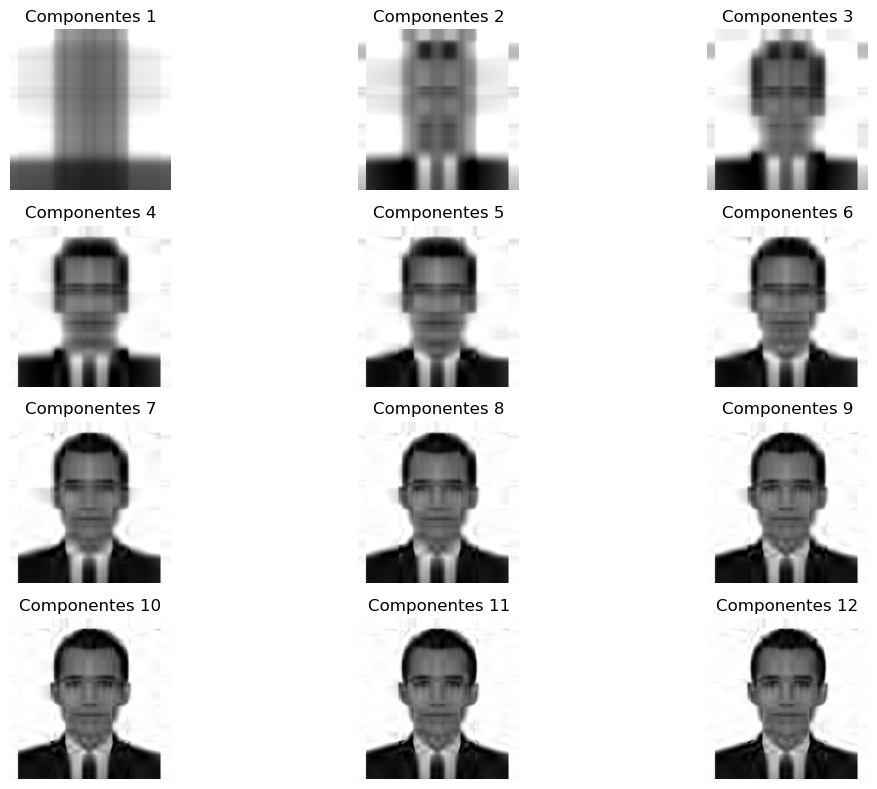

In [42]:
rows, cols = 4, 3

# Crea una figura para la cuadrícula de subfiguras
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))

for i in range(1, 13):
    svd = CustomSVD(n_components= i)

    svd.fit(image_resized_gayscale_array)
    transformed_data = svd.transform(image_resized_gayscale_array)
    reconstructed_data = svd.predict(image_resized_gayscale_array)

    subtracted_face = Image.fromarray(reconstructed_data)

    row_idx, col_idx = divmod(i - 1, cols)  # Calcular la posición en la cuadrícula
    axs[row_idx, col_idx].imshow(subtracted_face, cmap='gray')
    axs[row_idx, col_idx].axis('off')
    axs[row_idx, col_idx].set_title(f'Componentes {i}')

plt.tight_layout()
plt.show()

## **Exercise 5**.  ML performance without dimension reduction (base line)
Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?

In [43]:
# Information is imported from the mnist database
mnist = load_digits(return_X_y= False)

In [44]:
# filtering labels 0 and 8 in the database
filter_target_mnist = (mnist.target == 0) | (mnist.target == 8)

filter_target_mnist

array([ True, False, False, ...,  True, False,  True])

In [45]:
# Dividing the datast
y_mnist = mnist.target[filter_target_mnist]
x_mnist = mnist.data[filter_target_mnist]

print(x_mnist.shape)
print(y_mnist.shape)

(352, 64)
(352,)


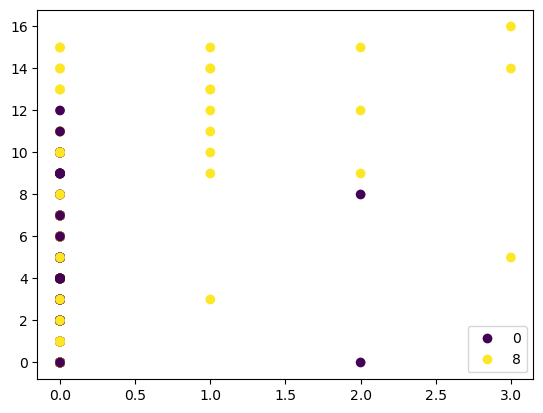

In [46]:
# plot independent variables
plot = plt.scatter(x_mnist[:,1], x_mnist[:, 2], c=y_mnist)
plt.legend(handles=plot.legend_elements()[0],
           labels=list(y_mnist))
plt.show()

In [47]:
# Dividing into train and test
x_train, x_test, y_train, y_test = train_test_split(x_mnist, y_mnist, test_size=0.25, random_state=42)

In [48]:
# Applying LR model
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Prediction:\n', y_pred)

Prediction:
 [0 0 8 0 0 0 0 0 8 0 8 0 8 8 8 0 8 8 0 0 0 8 8 0 8 8 0 8 0 0 8 8 8 8 0 0 0
 0 0 0 8 0 8 8 8 0 8 0 0 8 8 8 8 0 8 0 0 8 0 8 8 0 0 0 8 0 0 0 8 0 0 8 0 8
 0 0 8 0 0 8 8 8 0 8 0 8 8 8]


In [49]:
# Scoring
f1_score(y_test, y_pred, average='weighted')

1.0

The f1 score metric is calculated to measure the performance of the model. In this case the performance of the model is 1, i.e., each of the categories was fully predicted.

## **Exercise 6**.  ML performance with dimension reduction
Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.
- Plot the 2 new features generated by your algorithm
- Does this somehow impact the performance of your model?

### **SVD**

In [50]:
# Create an SVD object with a specified number of components
custom_svd_mnist = CustomSVD(n_components=2)

# Fit, transform and predict using the SVD model
custom_svd_mnist.fit(x_mnist)
transformed_x_mnist_custom_svd = custom_svd_mnist.transform(x_mnist)

/var/folders/3y/mth4f5sj3yb99mnhvx2_tp3c0000gp/T/ipykernel_98620/2531404378.py:26: RuntimeWarning: invalid value encountered in divide
  self.matrix_standardized = (matrix - self.mean) / self.std


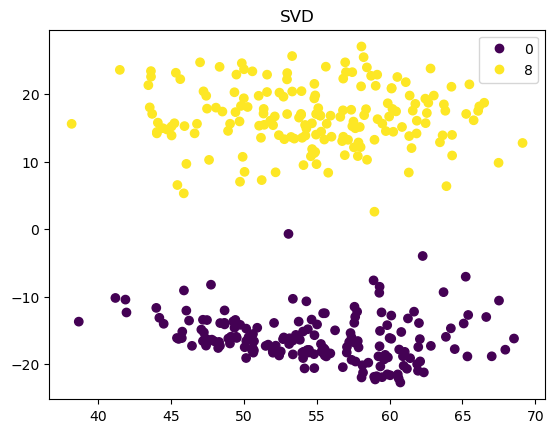

In [51]:
# Plotting SVD

plot = plt.scatter(transformed_x_mnist_custom_svd[:,0], transformed_x_mnist_custom_svd[:,1], c=y_mnist)
plt.legend(handles=plot.legend_elements()[0],
           labels=list(y_mnist))
plt.title('SVD')
plt.show()

In [52]:
# The database is divided into train and test to train the model
x_train_custom_svd, x_test_custom_svd, y_train_custom_svd, y_test_custom_svd = train_test_split(transformed_x_mnist_custom_svd, y_mnist, test_size=0.25, random_state=42)

In [53]:
# Modeling
model_custom_svd = LogisticRegression()
model_custom_svd.fit(x_train_custom_svd, y_train_custom_svd)
y_pred_custom_svd = model_custom_svd.predict(x_test_custom_svd)

In [54]:
# Evaluating
f1_score(y_test_custom_svd, y_pred_custom_svd, average='weighted')

0.9886407709937121

There were no differences with the results found in the metrics of the previous classification model without performing SVD, there was a decrease of 1.2% in performance.

### **PCA**

In [55]:
# Create an PCA object with a specified number of components
custom_pca_mnist = CustomPCA(n_components=2)

# Fit, transform using the PCA model
x_mnist_custom_pca = custom_pca_mnist.fit_transform(x_mnist)

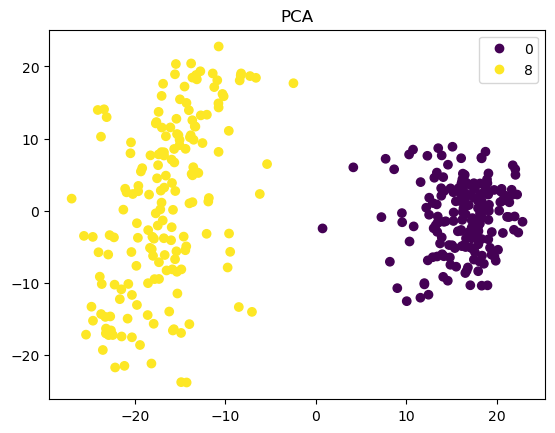

In [56]:
# Plotting PCA

plot = plt.scatter(x_mnist_custom_pca[:,0], x_mnist_custom_pca[:,1], c=y_mnist)
plt.legend(handles=plot.legend_elements()[0],
           labels=list(y_mnist))
plt.title('PCA')
plt.show()

In [57]:
# The database is divided into train and test to train the model
x_train_custom_pca, x_test_custom_pca, y_train_custom_pca, y_test_custom_pca = train_test_split(x_mnist_custom_pca, y_mnist, test_size=0.25, random_state=42)

In [58]:
# Modeling
model_custom_pca = LogisticRegression()
model_custom_pca.fit(x_train_custom_pca, y_train_custom_pca)
y_pred_custom_pca = model_custom_pca.predict(x_test_custom_pca)

In [59]:
# Evaluating
f1_score(y_test_custom_pca, y_pred_custom_pca, average='weighted')

1.0

There were no differences with the results found in the metrics of the previous classification model without performing PCA.

### **t-SNE**

In [60]:
# Create an instance of the TSNE class
tsne = CustomTSNE(n_components=2, perplexity=6.8, learning_rate=0.09, n_iter=170)

# Fit the TSNE model to the data and obtain the embedded representation
X_embedded_x_mnist_tsne = tsne.fit_transform(x_mnist)

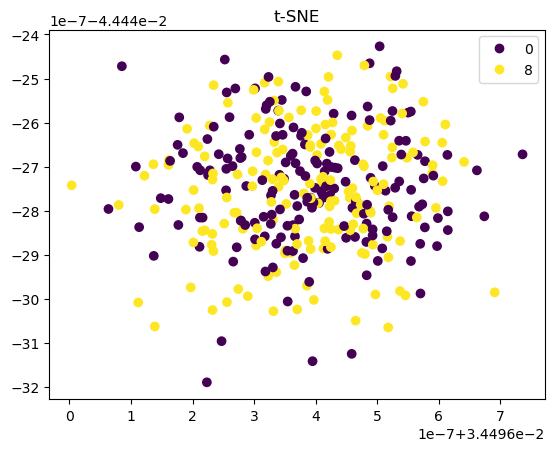

In [61]:
# Plotting t-SNE

plot = plt.scatter(X_embedded_x_mnist_tsne[:,0], X_embedded_x_mnist_tsne[:,1], c=y_mnist)
plt.legend(handles=plot.legend_elements()[0],
           labels=list(y_mnist))
plt.title('t-SNE')
plt.show()

In [62]:
# The database is divided into train and test to train the model
x_train_custom_svd, x_test_custom_svd, y_train_custom_svd, y_test_custom_svd = train_test_split(X_embedded_x_mnist_tsne, y_mnist, test_size=0.25, random_state=42)

In [63]:
# Modeling
model_custom_svd = LogisticRegression()
model_custom_svd.fit(x_train_custom_svd, y_train_custom_svd)
y_pred_custom_svd = model_custom_svd.predict(x_test_custom_svd)

In [64]:
# Evaluating
f1_score(y_test_custom_svd, y_pred_custom_svd, average='weighted')

0.35888738127544095

The score here decreased considerably, so the performance of reducing dimensionality with t-SNE did not improve.

## **Exercise 7**.  ML performance with and without dimension reduction (libraries)
Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?

### **SVD**

In [65]:
# Create a SVD object and fit it to the data
svd = TruncatedSVD(n_components=2)
x_mnist_svd = svd.fit_transform(x_mnist)

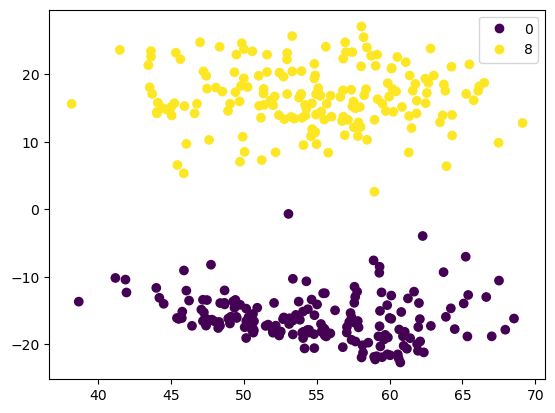

In [66]:
# plot
plot = plt.scatter(x_mnist_svd[:,0], x_mnist_svd[:,1], c=y_mnist)
plt.legend(handles=plot.legend_elements()[0],
           labels=list(y_mnist))
plt.show()

In [67]:
# The database is divided into train and test to train the model
x_train_svd, x_test_svd, y_train_svd, y_test_svd = train_test_split(x_mnist_svd, y_mnist, test_size=0.25, random_state=42)

In [68]:
# Modeling
model_svd = LogisticRegression()
model_svd.fit(x_train_svd, y_train_svd)
y_pred_svd = model_svd.predict(x_test_svd)

In [69]:
# Evaluating
f1_score(y_test_svd, y_pred_svd, average='weighted')

0.9886407709937121

The above plot is quite similar to our hand-made model as well as the model performance

### **PCA**

In [70]:
# Create a PCA object and fit it to the data
pca = PCA(n_components=2)
x_mnist_pca = pca.fit_transform(x_mnist)

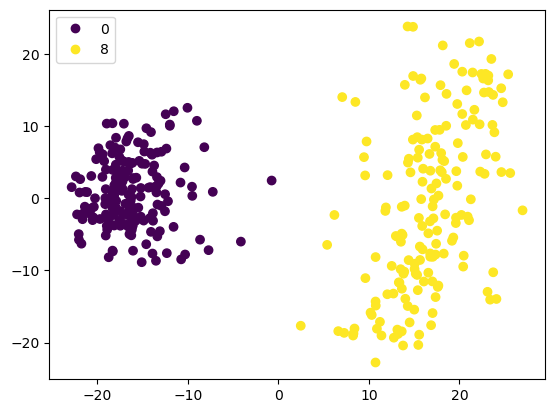

In [71]:
# plot
plot = plt.scatter(x_mnist_pca[:,0], x_mnist_pca[:,1], c=y_mnist)
plt.legend(handles=plot.legend_elements()[0],
           labels=list(y_mnist))
plt.show()

In [72]:
# The database is divided into train and test to train the model
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_mnist_pca, y_mnist, test_size=0.25, random_state=42)

In [73]:
# Modeling and predicting
model_pca = LogisticRegression()
model_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(x_test_pca)

In [74]:
# Evaluating
f1_score(y_test_pca, y_pred_pca, average='weighted')

1.0

There were no differences with the results found in the metrics of the previous classification models, both in the model without performing SVD and in the model with CustomSVD, as in the latter the validation metric of the f1_score is 1.

This may be due to the small amount of data presented in the test database or to the fact that the model is overfitted from the beginning.

### **t-SNE**

In [ ]:
# Create a t-SNE object and fit it to the data
tsne = TSNE(n_components=2)
x_mnist_tsne = tsne.fit_transform(x_mnist)

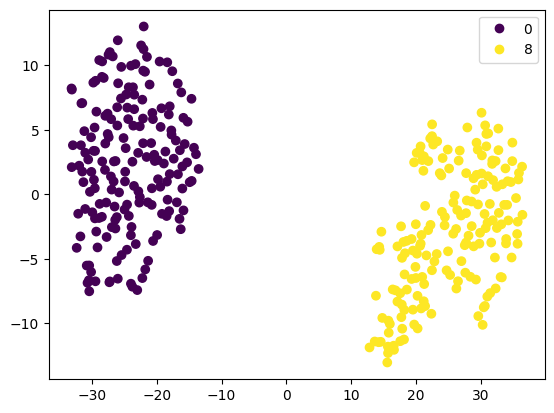

In [ ]:
# plot
plot = plt.scatter(x_mnist_tsne[:,0], x_mnist_tsne[:,1], c=y_mnist)
plt.legend(handles=plot.legend_elements()[0],
          labels=list(y_mnist))
plt.show()

In [ ]:
# The database is divided into train and test to train the model
x_train_custom_tsne, x_test_custom_tsne, y_train_custom_tsne, y_test_custom_tsne = train_test_split(x_mnist_tsne, y_mnist, test_size=0.25, random_state=42)

In [ ]:
# Modeling
x_mnist_tsne = LogisticRegression()
x_mnist_tsne.fit(x_train_custom_tsne, y_train_custom_tsne)
y_pred_custom_tsne = x_mnist_tsne.predict(x_test_custom_tsne)

In [ ]:
# Evaluating
f1_score(y_test_custom_tsne, y_pred_custom_tsne, average='weighted')

1.0

Using the t-SNE library, the separation and the dataset was much better. This may be due to the simplified way in which the t-SNE was constructed in this workshop, using simplified forms of gradient descent.

## **Exercise 8**. Strengthening PSA
What strategies do you know (or can think of) in order to make PCA more robust?

The following were found:

1. ***Data Preprocessing***:

- Standardization or Scaling: Ensure that all features are on a similar scale by standardizing or scaling them. This can help prevent features with larger scales from dominating the PCA results.

2. ***Handling Missing Data***:

- Imputation: Address missing values in your dataset using imputation techniques such as mean, median, or mode imputation.

3. ***Outlier Detection and Removal***:

- Identify and remove outliers in your dataset to prevent them from influencing the principal components significantly. Robust methods like the Modified Z-Score or the IQR-based approach can be used.

4. ***Feature Selection***:

- Carefully select relevant features and exclude irrelevant ones before applying PCA. This can reduce noise and improve the robustness of the results.

5. ***Robust PCA Algorithms***:

- Consider using robust PCA algorithms that are less sensitive to outliers. One such method is Robust PCA (RPCA), which aims to separate the data into low-rank and sparse components, making it more resilient to outliers.

6. ***Handling Correlated Features***:

- Deal with multicollinearity (highly correlated features) by either removing one of the correlated features or using dimensionality reduction techniques that preserve information better than PCA for correlated data (e.g., Factor Analysis).


7. ***Choosing the Number of Components***:

- Select the number of principal components carefully. Instead of using arbitrary criteria, such as retaining a fixed percentage of variance, consider using cross-validation or scree plots to determine the optimal number of components.

8. ***Cross-Validation***:

- Utilize cross-validation to assess the stability and generalizability of your PCA results. This can help identify overfitting or instability issues.

9. ***Robust Covariance Estimation***:

- Instead of using the sample covariance matrix, consider using robust covariance estimation methods like Minimum Covariance Determinant (MCD) or the Ledoit-Wolf shrinkage estimator to calculate the covariance matrix used in PCA.

10. ***Regularization***:

- Apply regularization techniques like ridge PCA or sparse PCA to add constraints during PCA to reduce the impact of noisy or irrelevant features.

11. ***Whitening***:

- After performing PCA, consider whitening the data to transform the principal components into uncorrelated variables with unit variances. This can improve the robustness of subsequent analysis.

12. ***Visualization and Interpretation***:

- Visualize the results of PCA to check for any anomalies or unexpected patterns that may indicate problems with data quality or the PCA process itself.

13. ***Robustness Testing***:

- Conduct sensitivity analysis by introducing artificial outliers or perturbations to test how robust your PCA results are to changes in the data.

14. ***Regular Maintenance***:

- If your data changes over time, periodically re-run PCA to ensure that the principal components remain relevant and robust to new data.

15. ***Alternative Dimensionality Reduction Techniques***:

- Consider using other dimensionality reduction techniques like t-Distributed Stochastic Neighbor Embedding (t-SNE) or Uniform Manifold Approximation and Projection (UMAP) when PCA is not suitable for your data or task.

## **Exercise 9**.  UMAP and its math
What are the underlying mathematical principles behind UMAP? What is it useful for?

UMAP, which stands for Uniform Manifold Approximation and Projection, is a dimensionality reduction technique commonly used in data analysis and machine learning. It is often compared to other dimensionality reduction techniques like t-Distributed Stochastic Neighbor Embedding (t-SNE) and Principal Component Analysis (PCA). The underlying mathematical principles behind UMAP involve concepts from algebraic topology, Riemannian geometry, and optimization.

### **Math overview**

1. ***Algebraic Topology***: UMAP uses algebraic topology concepts to construct a high-dimensional topological representation of the data. It defines a topological representation of data as a fuzzy, weighted graph. The data points are considered as nodes, and edges between nodes are weighted based on similarity.

2. ***Riemannian Geometry***: UMAP uses Riemannian geometry to define a distance metric in the high-dimensional space. This distance metric takes into account the topological structure of the data, making it different from traditional Euclidean distance metrics.

3. ***Optimization***: UMAP optimizes the low-dimensional representation of data by minimizing a cost function that balances the preservation of local and global data structures. It seeks to find a mapping from the high-dimensional space to the low-dimensional space that captures the underlying structure of the data.

The key idea behind UMAP is to preserve the topological structure of the data in the low-dimensional representation. It aims to strike a balance between capturing global and local relationships, which can be challenging for techniques like PCA and t-SNE.



### **UMAP applications in data science**

1. ***Dimensionality Reduction***: UMAP is primarily used for reducing the dimensionality of high-dimensional data while preserving its inherent structure. This is useful for visualization, as it allows you to explore and understand complex data in a lower-dimensional space.

2. ***Clustering and Visualization***: UMAP can be used to visualize high-dimensional data in a two-dimensional or three-dimensional space, making it easier to identify clusters or patterns within the data. It is commonly used for exploratory data analysis.

3. ***Feature Engineering***: UMAP can be employed for feature engineering in machine learning tasks. By reducing the dimensionality of the data, it can help improve the performance of machine learning models by removing noise or irrelevant features.

4. ***Anomaly Detection***: UMAP can be used to identify anomalies or outliers in high-dimensional data by visualizing the data in a lower-dimensional space and highlighting data points that deviate from the expected patterns.

5. ***Semi-Supervised Learning***: UMAP embeddings can be incorporated into semi-supervised learning algorithms to improve the performance of classification tasks by leveraging the reduced-dimensional representations.

Overall, UMAP is a powerful tool for exploratory data analysis and dimensionality reduction, particularly for datasets with complex, nonlinear structures where preserving topological relationships is crucial.

## **Exercise 10**. LDA and its math
What are the underlying mathematical principles behind LDA? What is it useful for?

Latent Dirichlet Allocation (LDA) is a generative probabilistic model used in natural language processing and machine learning for topic modeling. It helps discover the underlying topics within a collection of documents and is widely used in applications like text analysis, information retrieval, and document clustering. The mathematical principles behind LDA involve probability theory, specifically Bayesian inference and Dirichlet distributions.

### **Math overview**

1. ***Probabilistic Modeling***: LDA is a generative probabilistic model, which means it assumes a probabilistic process for generating documents. It models the process by which a collection of documents is created as a mixture of topics.

2. ***Document-Topic Distribution***: LDA assumes that each document in the collection is a mixture of topics. This mixture is represented as a probability distribution over topics for each document. This distribution is typically a Dirichlet distribution.

3. ***Topic-Word Distribution***: LDA also assumes that each topic is a distribution over words in the vocabulary. This distribution is also represented as a Dirichlet distribution.

4. ***Word Assignment***: LDA models the process of generating words in a document. For each word in a document, it first selects a topic from the document's topic distribution. Then, it selects a word from the selected topic's word distribution. This word is added to the document.

5. ***Dirichlet Distributions***: The Dirichlet distribution is a probability distribution over probability distributions. It's used to model the distribution of topics in documents and the distribution of words in topics.

6. ***Inference***: Given a collection of documents, the goal of LDA is to infer the underlying topic distributions for each document and the word distributions for each topic. This is typically done using techniques like Variational Inference or Gibbs Sampling.

7. ***Hyperparameters***: LDA has hyperparameters, such as the concentration parameters of the Dirichlet distributions, which control the sparsity of the topic distributions. Tuning these hyperparameters can affect the quality of topics discovered.

### **LDA applications in data science**

1. ***Topic Modeling***: LDA is primarily used for topic modeling, which is the process of automatically identifying topics within a collection of documents. It helps organize and summarize large document collections.

2. ***Information Retrieval***: LDA can be used to improve information retrieval by associating documents with topics. This can aid in search and recommendation systems.

3. ***Content Recommendation***: It is used in content recommendation systems to suggest related articles, news, or products based on the topics found in a user's history.

4. ***Document Clustering***: LDA can be applied to cluster similar documents together, which is useful for document organization and categorization.

5. ***Text Summarization***: LDA can be used to extract the most important topics from a set of documents, which can then be used to generate topic-based summaries.

6. ***Sentiment Analysis***: By associating topics with sentiment words, LDA can help analyze the sentiment expressed in a collection of documents.

In summary, LDA is a powerful probabilistic model for discovering hidden topics within a collection of documents, and its mathematical foundations involve Bayesian probability theory, Dirichlet distributions, and probabilistic modeling. It finds applications in a wide range of fields where understanding and organizing textual data is essential.

## **Exercise 11**.  Scaling the model to HTTP server
Use your unsupervised Python package as a basis to build an HTTP server that receives a record as input and returns the class of the image. Suggestions: MNIST digit classifier, Iris classifier

In [76]:
# Create a Flask application
app = Flask(__name__)

# Define a route for custom PCA
@app.route('/custom_pca', methods=['POST'])
def custom_pca():
    try:
        # Receives the dat as JSON format input
        data_x = request.json['data_x']
        data_y = request.json['data_y']

        # Initialize and fit a custom PCA model
        custom_pca_prod = CustomPCA(n_components=2)
        dim_red = custom_pca_prod.fit_transform(np.array(data_x))

        # Create a scatter plot
        plot = plt.scatter(dim_red[:,0], dim_red[:,1], c=data_y)
        plt.legend(handles=plot.legend_elements()[0],
           labels=list(data_y))

        # Save the scatter plot as an image
        plt.savefig('pca.png')

        # Return the dimensionality reduction results as a JSON response
        return jsonify({'dimentionality_reduction': dim_red.tolist()})

    except Exception as e:
        return jsonify({'error': str(e)})

# Define a route to view the custom PCA plot
@app.route('/view_custom_pca', methods=['GET'])
def view_custom_pca():
    try:
        # Return the PCA plot as a PNG image
        return send_file('pca.png', mimetype='image/png')

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    # Run the Flask application
    app.run(host='0.0.0.0', port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.2.180:5001/ (Press CTRL+C to quit)
192.168.2.180 - - [08/Sep/2023 16:50:18] "GET / HTTP/1.1" 404 -
192.168.2.180 - - [08/Sep/2023 16:50:19] "GET /favicon.ico HTTP/1.1" 404 -
192.168.2.180 - - [08/Sep/2023 16:50:33] "GET /custom_pca HTTP/1.1" 405 -
192.168.2.180 - - [08/Sep/2023 16:50:44] "GET /view_custom_pca HTTP/1.1" 200 -
